# Подключение необходимых библиотек

In [264]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.optimize import minimize

# Аналитика датасета

In [265]:
df = pd.read_csv('diamonds.csv')

In [266]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [267]:
del df['Unnamed: 0']

In [268]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### После удаления ненужного столбца с номером алмаза, мы можем проанализировать признаки которые мы имеем

**carat**- это очевидно вес алмаза измеряемый в каратах

**color**- это цвет алмаза в градации от худшего J до лучшего D

**clarity**- это чистота алмаза от лучшего к худшему (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)

**depth**- этот признак отображает общий процент глубины алмаза(43--79) вычисляемый по формуле \begin{equation*}
\frac{z}{\text{среднее}(x, y)} = \frac{2z}{x + y}
\end{equation*}




**table**-это ширина верхней части алмаза, измеряемая относительно самой широкой точки (43--95)


**price** -это цена в долларах

**x**-длина в мм (0--10.74)

**y**-ширина в мм(0--58.9)

**z**-глубина в мм(0--31.8)

### С одной стороны может показаться что признаки x,y,z напрямую коррелируются с общей глубиной и их можно удалить из датасета, но с другой стороны цена отдельных объектов может коррелироваться с определенной размерностью x,y,z поэтому просто так мы удалить не можем.

In [130]:
df.shape

(53940, 10)

In [131]:
df.info

<bound method DataFrame.info of        carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]>

C:\Users\Vladimir\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


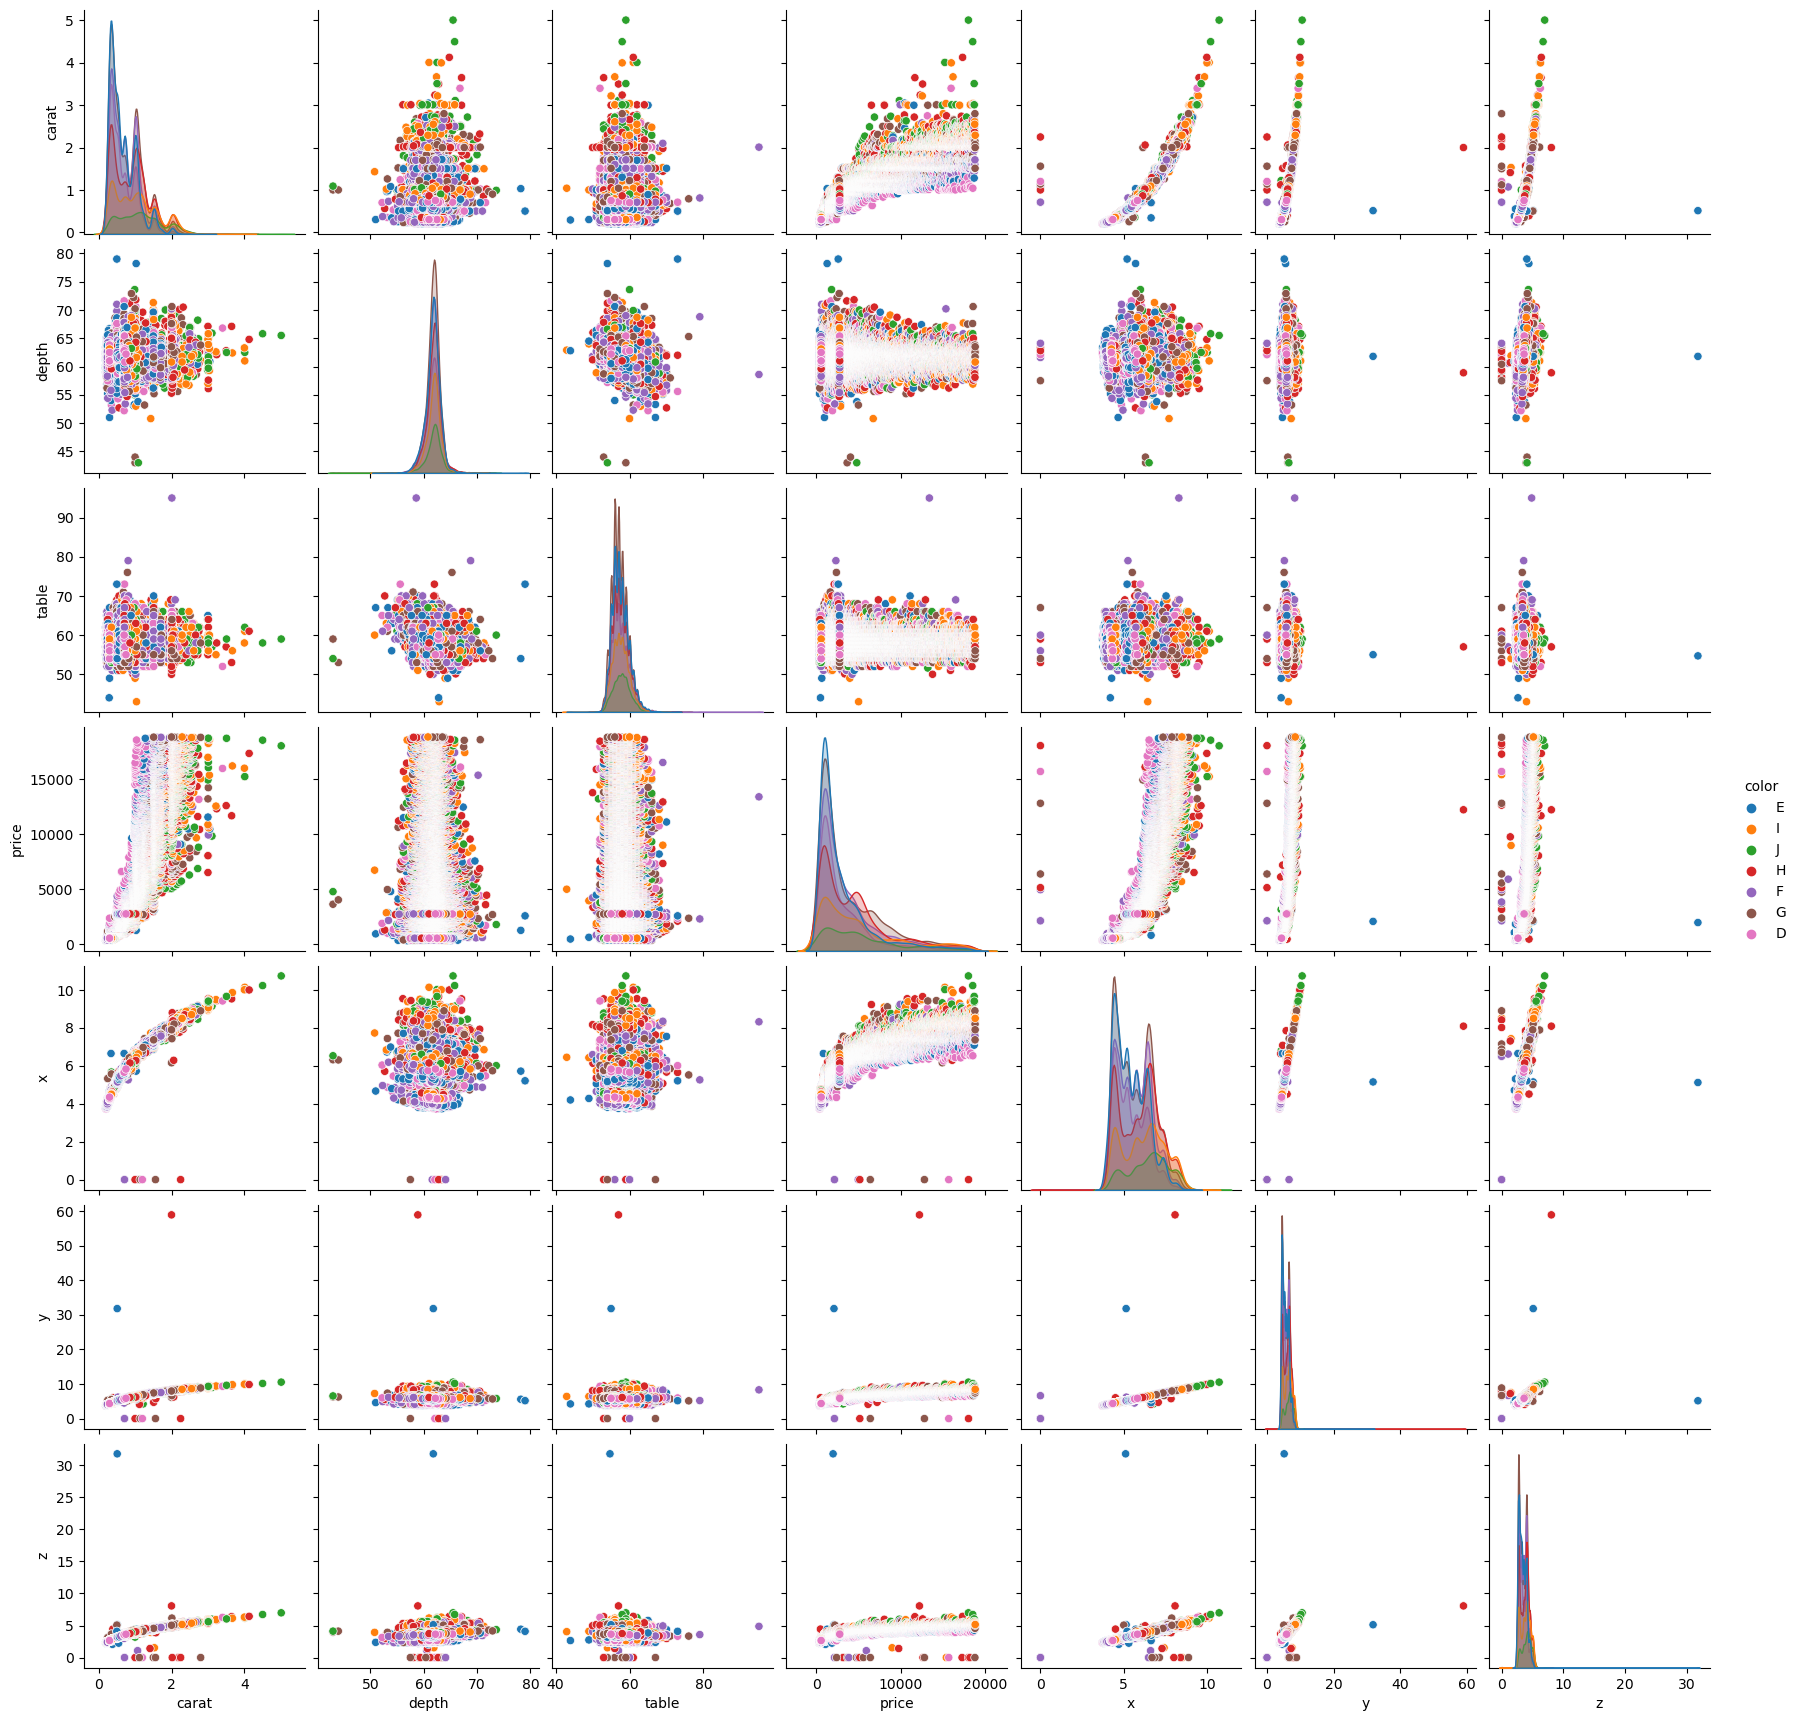

In [19]:
sns.pairplot(df,hue="color")

# Подробный анализ графиков и работа с выбросами

Как можно было заметить из графиков зависимости цены от признаков в некоторых объектах x,y,z имеют нулевое значение, что учитывая смысл нашего датасета быть не может, еще раз убедимся в этом приблизив график зависимости цены от признака x

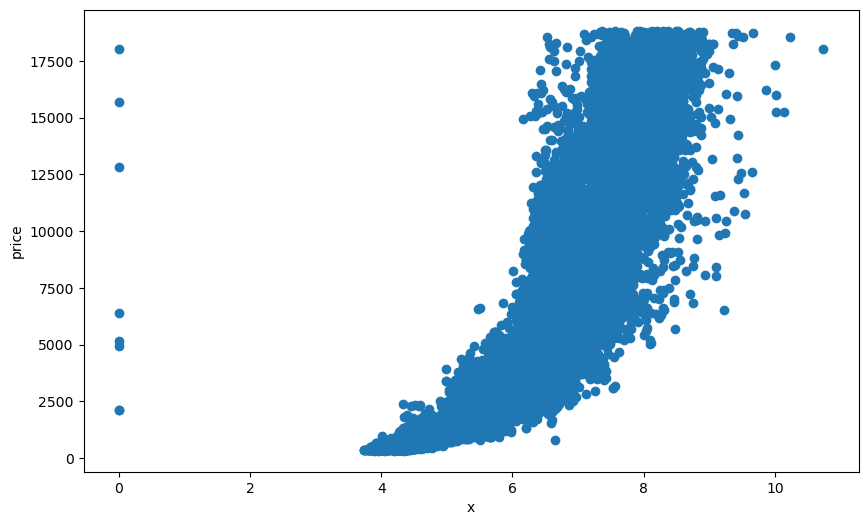

In [235]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['price'])
plt.xlabel('x')
plt.ylabel('price')
plt.show()

Да, всё верно, очистим наш датасет от этих объектов

In [269]:
df=df.drop(df[df["x"]==0].index)
df=df.drop(df[df["y"]==0].index)
df=df.drop(df[df["z"]==0].index)

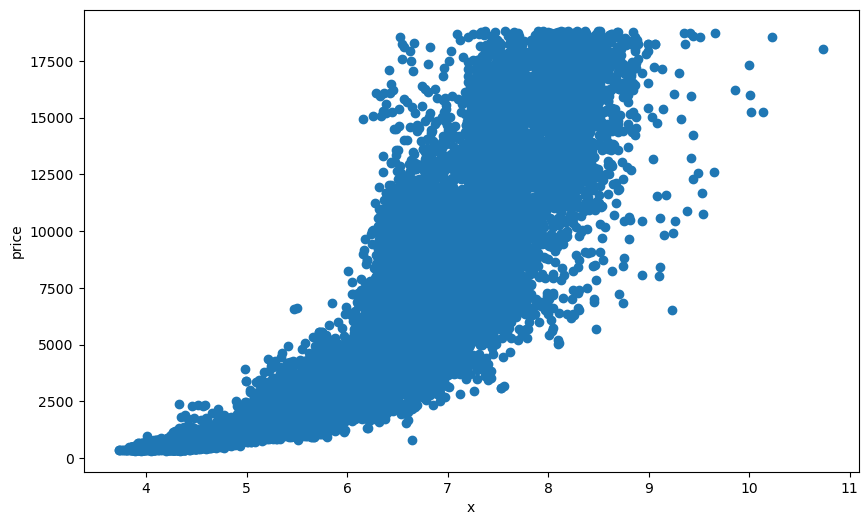

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['price'])
plt.xlabel('x')
plt.ylabel('price')
plt.show()

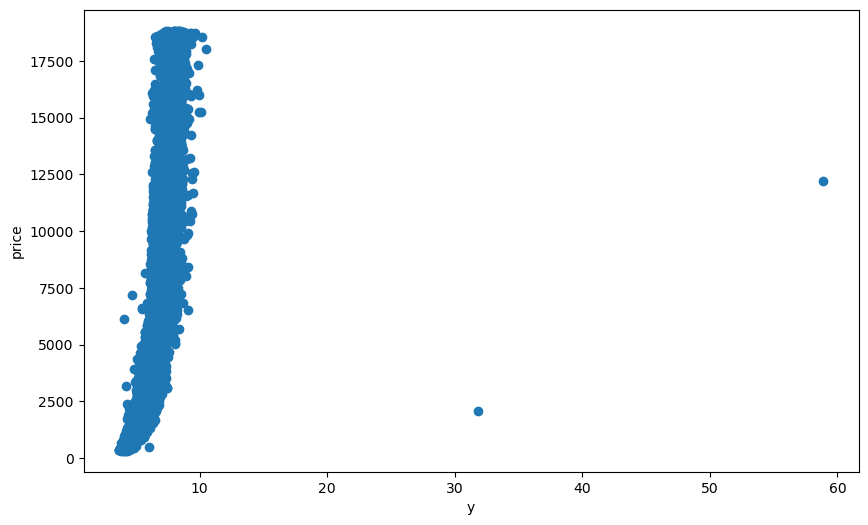

In [238]:
plt.figure(figsize=(10, 6))
plt.scatter(df['y'], df['price'])
plt.xlabel('y')
plt.ylabel('price')
plt.show()

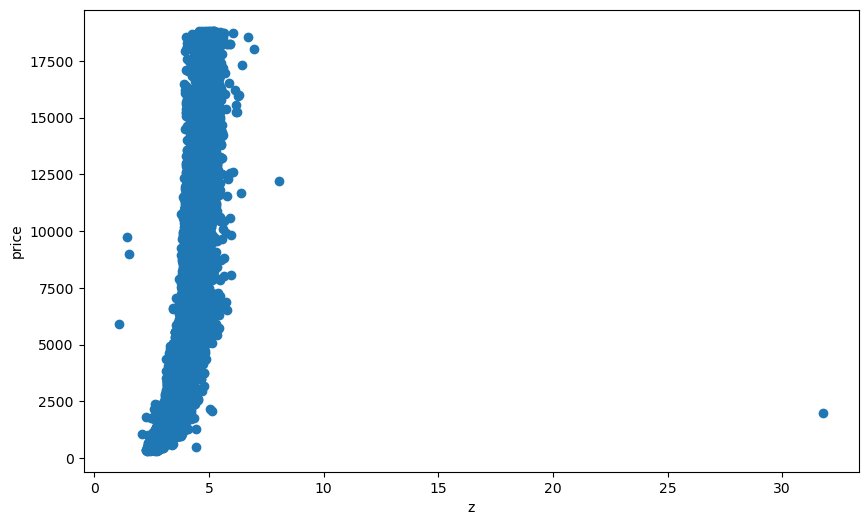

In [239]:
plt.figure(figsize=(10, 6))
plt.scatter(df['z'], df['price'])
plt.xlabel('z')
plt.ylabel('price')
plt.show()

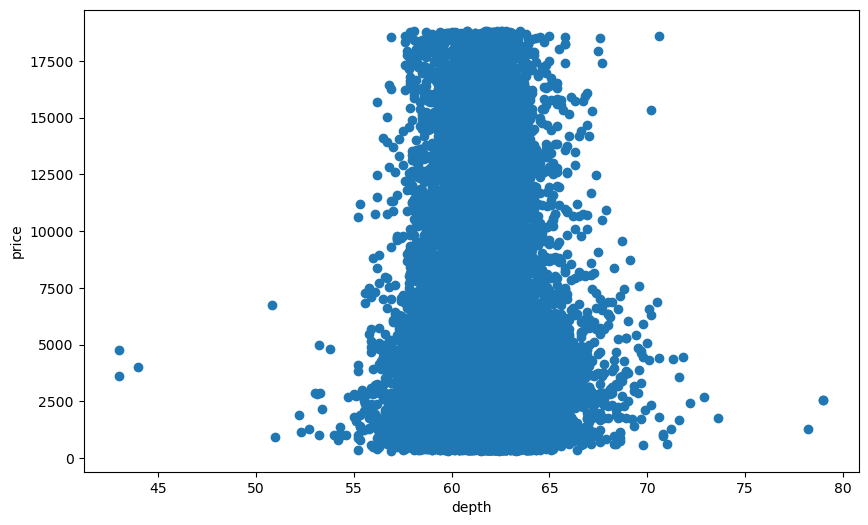

In [240]:
plt.figure(figsize=(10, 6))
plt.scatter(df['depth'], df['price'])
plt.xlabel('depth')
plt.ylabel('price')
plt.show()

Так же мы имеем выбросы на y,z после значения 30, можем от них тоже избавиться

In [270]:
df=df.drop(df[df["x"]>=30].index)
df=df.drop(df[df["y"]>=30].index)

In [242]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# Подготовка датасета к обучению, замена категориальных признаков на числовые

In [271]:
df = pd.get_dummies(df, dtype=int)


In [272]:
df

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Модель

In [273]:
y=df['price'].values
del df['price']
X=df.values
X_temp=X[2]

In [274]:
X_numeric = df.iloc[:, :5] 
X_bool = df.iloc[:, 5:]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X=np.hstack([X_numeric_scaled, X_bool])

#X=df.values
#print(X)
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [290]:
X[1]

array([-1.24043645, -1.36115144,  1.58595263, -1.64518464, -1.70385662,
        2.31      ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [277]:
model.coef_, model.intercept_

(array([ 5.50541560e+03,  8.67097892e+01, -6.01053220e+01, -1.77627097e+03,
         1.95107589e+03, -2.19005193e+03, -1.92510476e+13, -1.92510476e+13,
        -1.92510476e+13, -1.92510476e+13, -1.92510476e+13, -1.27082885e+14,
        -1.27082885e+14, -1.27082885e+14, -1.27082885e+14, -1.27082885e+14,
        -1.27082885e+14, -1.27082885e+14,  9.21167772e+14,  9.21167772e+14,
         9.21167772e+14,  9.21167772e+14,  9.21167772e+14,  9.21167772e+14,
         9.21167772e+14,  9.21167772e+14]),
 -774833839288797.6)

In [278]:
model.predict(X_test)

array([6434.375, 3113.25 , 6200.75 , ..., 3328.375, 3938.625, 1781.875])

In [279]:
model.score(X,y)

0.9160334638797215

## Можем заметить что наша модель специально "раздувает" коэффициенты для минимизации ошибки, применим в данном случае регуляризацию Ridge

In [280]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)


Ridge()

In [281]:
ridge.coef_

array([ 5502.29069221,    82.48556947,   -60.27460451, -1748.19599253,
        1893.02440872, -2138.98241274,  -495.24560832,   -30.58024112,
         228.97005347,   200.14405239,    96.71174043,   825.89387005,
         606.50566118,   564.31400187,   342.18832291,  -149.18499594,
        -658.81223472, -1530.90462403, -3801.39993554,  1511.72017348,
        -145.54412206, -1094.78177223,   761.68396627,   465.476621  ,
        1178.1451116 ,  1124.69996529])

In [282]:
y_pred=ridge.predict(X_test)

In [283]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R^2: {r2:.2f}')

MSE: 1270.44
MAE: 729.50
R^2: 0.90


## Попытка решить задачу оптимизации по поиску оптимальных параметров для цены

In [327]:
def cost_function(X_input):
    # Разделяем X_input на числовые и булевы признаки
    X_numeric_input = X_input[:5]  # Первые 5 признаков - числовые
    X_bool_input = X_input[5:]  # Оставшиеся признаки - булевы

    # Стандартизируем только числовые признаки
    X_numeric_scaled_input = scaler.transform([X_numeric_input])  # Стандартизируем только числовые признаки

    # Преобразуем булевы признаки в двумерный массив для объединения
    X_bool_input = np.reshape(X_bool_input, (1, -1))  # Преобразуем булевы признаки в форму (1, 21)

    # Объединяем стандартизированные числовые признаки с булевыми
    X_input_scaled = np.hstack([X_numeric_scaled_input, X_bool_input])

    # Предсказание цены с использованием модели
    predicted_price = ridge.predict(X_input_scaled)[0]
    target_price = 8000  # Целевая цена для минимизации
    cost = abs(predicted_price - target_price)  # Стоимость (разница от целевой цены)
    return cost

In [328]:
X_temp

array([ 0.23, 56.9 , 65.  ,  4.05,  4.07,  2.31,  0.  ,  1.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ,  0.  ,  0.  ])

In [329]:
initial_guess = np.array([0.23, 56.9, 65.0, 4.05, 4.07, 2.31, 0.0, 1.0, 0.0, 
                          0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
                          0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])

In [330]:
result = minimize(cost_function, initial_guess, method='L-BFGS-B')

C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X doe

C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X doe

In [331]:
result

  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 3.2260095395031385e-06
        x: [ 7.691e-01  5.690e+01 ...  5.422e-02  5.199e-02]
      nit: 7
      jac: [ 1.098e+04 -5.759e+01 ...  5.448e+02  4.913e+02]
     nfev: 3051
     njev: 113
 hess_inv: <26x26 LbfgsInvHessProduct with dtype=float64>

In [332]:
result = minimize(cost_function, initial_guess, method='Nelder-Mead')


C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Vladimir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X doe

In [333]:
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.00010086999282066245
             x: [ 3.017e-01  5.502e+01 ...  7.610e-04  6.866e-04]
           nit: 810
          nfev: 1389
 final_simplex: (array([[ 3.017e-01,  5.502e+01, ...,  7.610e-04,
                         6.866e-04],
                       [ 3.017e-01,  5.502e+01, ...,  7.610e-04,
                         6.866e-04],
                       ...,
                       [ 3.017e-01,  5.502e+01, ...,  7.610e-04,
                         6.866e-04],
                       [ 3.017e-01,  5.502e+01, ...,  7.610e-04,
                         6.866e-04]]), array([ 1.009e-04,  1.009e-04, ...,  1.892e-04,  1.995e-04]))

In [334]:
result.x

array([ 3.01699731e-01,  5.50182102e+01,  4.95532265e+01,  1.89108722e+00,
        5.69268346e+00,  2.15525177e+00, -1.22976645e-04,  8.94372238e-01,
        1.87350507e-04, -6.53445041e-05, -1.77227506e-04, -7.27688793e-04,
        1.22619971e+00,  4.14697377e-04, -5.69154758e-04,  9.07521062e-06,
       -8.83967362e-05, -1.66741367e-03, -4.76484596e-04, -8.59421864e-05,
       -9.97923881e-05,  2.39817033e-04,  1.23213835e+00,  4.67571200e-04,
        7.60987466e-04,  6.86622761e-04])

In [335]:
optimized_params = result.x
optimized_numeric = optimized_params[:5]
optimized_numeric_original_scale = scaler.inverse_transform([optimized_numeric])[0]

In [336]:
optimized_numeric_original_scale

array([  0.94061751, 140.55169571, 168.16172015,   7.8484473 ,
        12.05943526])

# В данном случае мы смогли оптимизировать параметры, но не беря в учет булевы значения, в данном случае над